In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [147]:
#Loading the dataset
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [148]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [149]:
#print the shape of the dataset
airbnb.shape

(48895, 16)

In [150]:
#Print the datatype of the dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [151]:
#remove possible duplicates...
airbnb.drop_duplicates(inplace = True)

In [152]:
#Check null values in each column
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [153]:
airbnb.drop(['name', 'id', 'host_id', 'host_name','last_review'], axis = 1, inplace = True)

In [154]:
#check the result
airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [155]:
#Replacing missing values and NaN values in the reviews per month column
airbnb.fillna({'reviews_per_month': 0}, inplace = True)
airbnb.reviews_per_month.isnull().sum()

0

In [156]:
airbnb.isnull().sum()
airbnb.dropna(how = 'any', inplace = True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.5+ MB


In [157]:
#printing all the column names
airbnb.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

<Axes: >

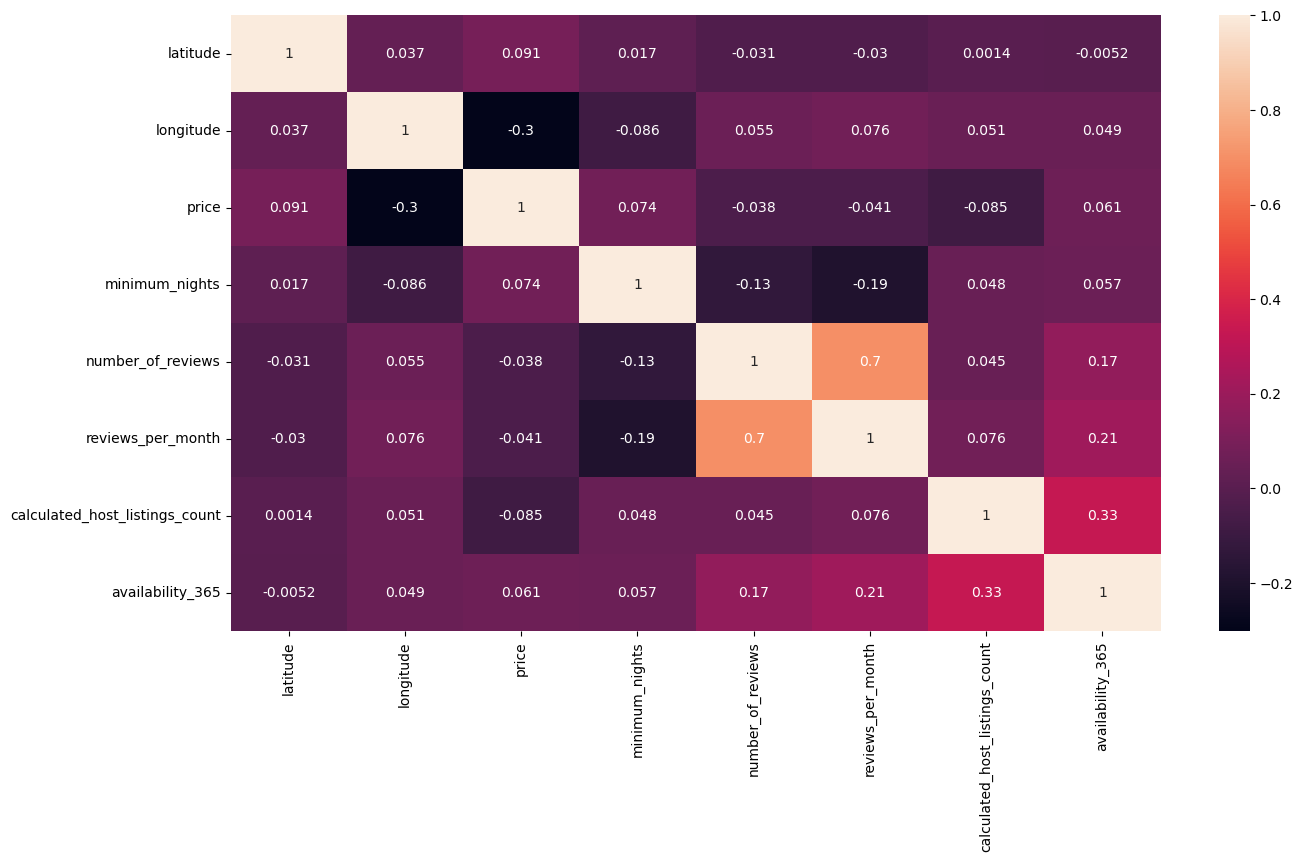

In [158]:
corr = airbnb.corr(method = 'kendall')
plt.figure(figsize = (15, 8))
sns.heatmap(corr, annot = True)

In [159]:
airbnb.columns = airbnb.columns.str.strip()

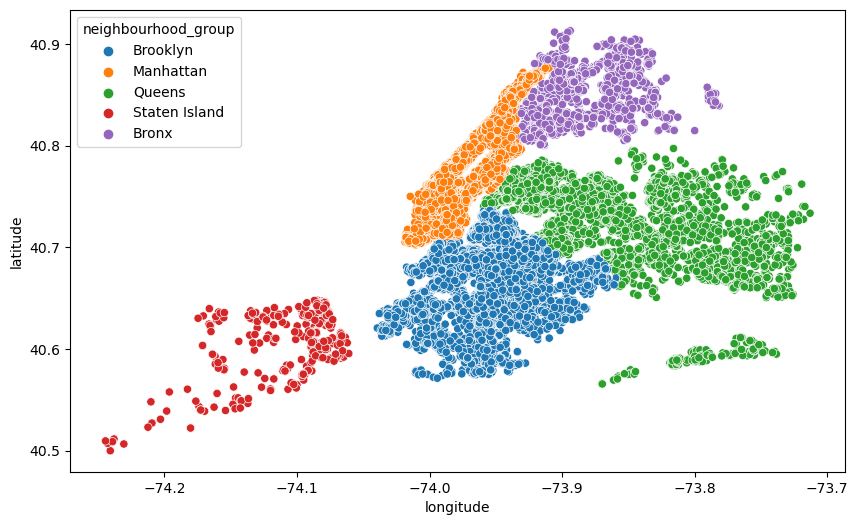

In [160]:
#Map of the neighbourhood group
plt.figure(figsize=(10,6))
sns.scatterplot(x = airbnb.longitude, y = airbnb.latitude, hue=airbnb.neighbourhood_group)
plt.ioff()

In [162]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [163]:
#Map of the room type
plt.figure(figsize=(10,6))
sns.scatterplot(x = airbnb.longitude, y = airbnb.latitude, hue=airbnb.room_type)

<Axes: xlabel='longitude', ylabel='latitude'>

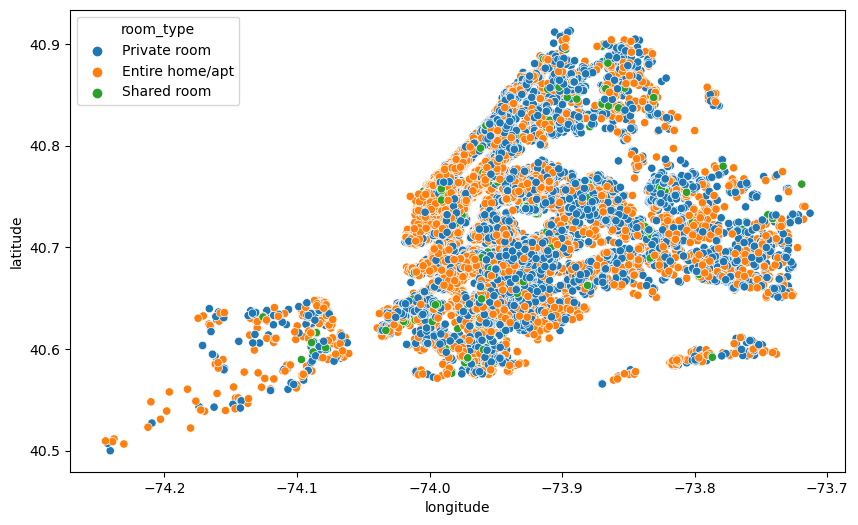

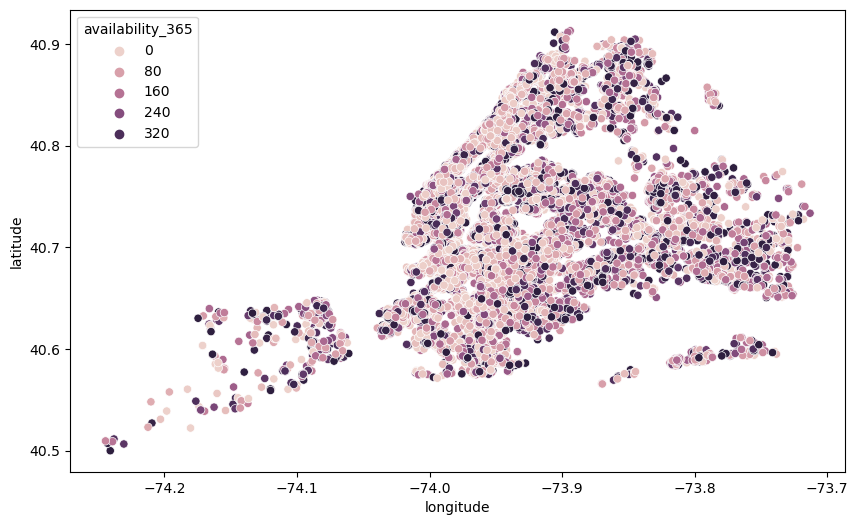

In [164]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = airbnb.longitude,y = airbnb.latitude,hue=airbnb.availability_365)
plt.show()

In [165]:
#Regression Analysis
#Drop useless column for the model
airbnb.columns
airbnb.drop(['latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis = 1, inplace = True)

In [166]:
airbnb.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [167]:
#Let's encode the categorical variables

def Encode(airbnb): 
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]: 
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [168]:
airbnb_en

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0
...,...,...,...,...,...,...
48890,0,0,70,2,2,9
48891,0,0,40,4,2,36
48892,1,1,115,10,1,27
48893,1,2,55,1,6,2


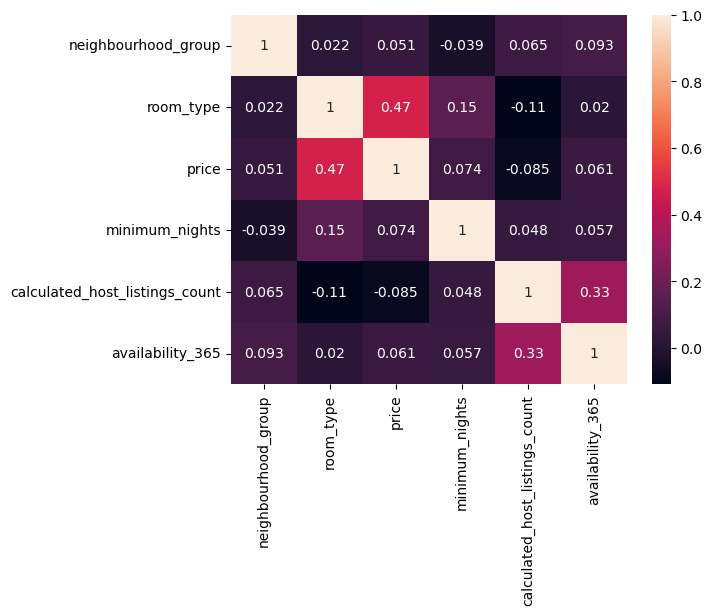

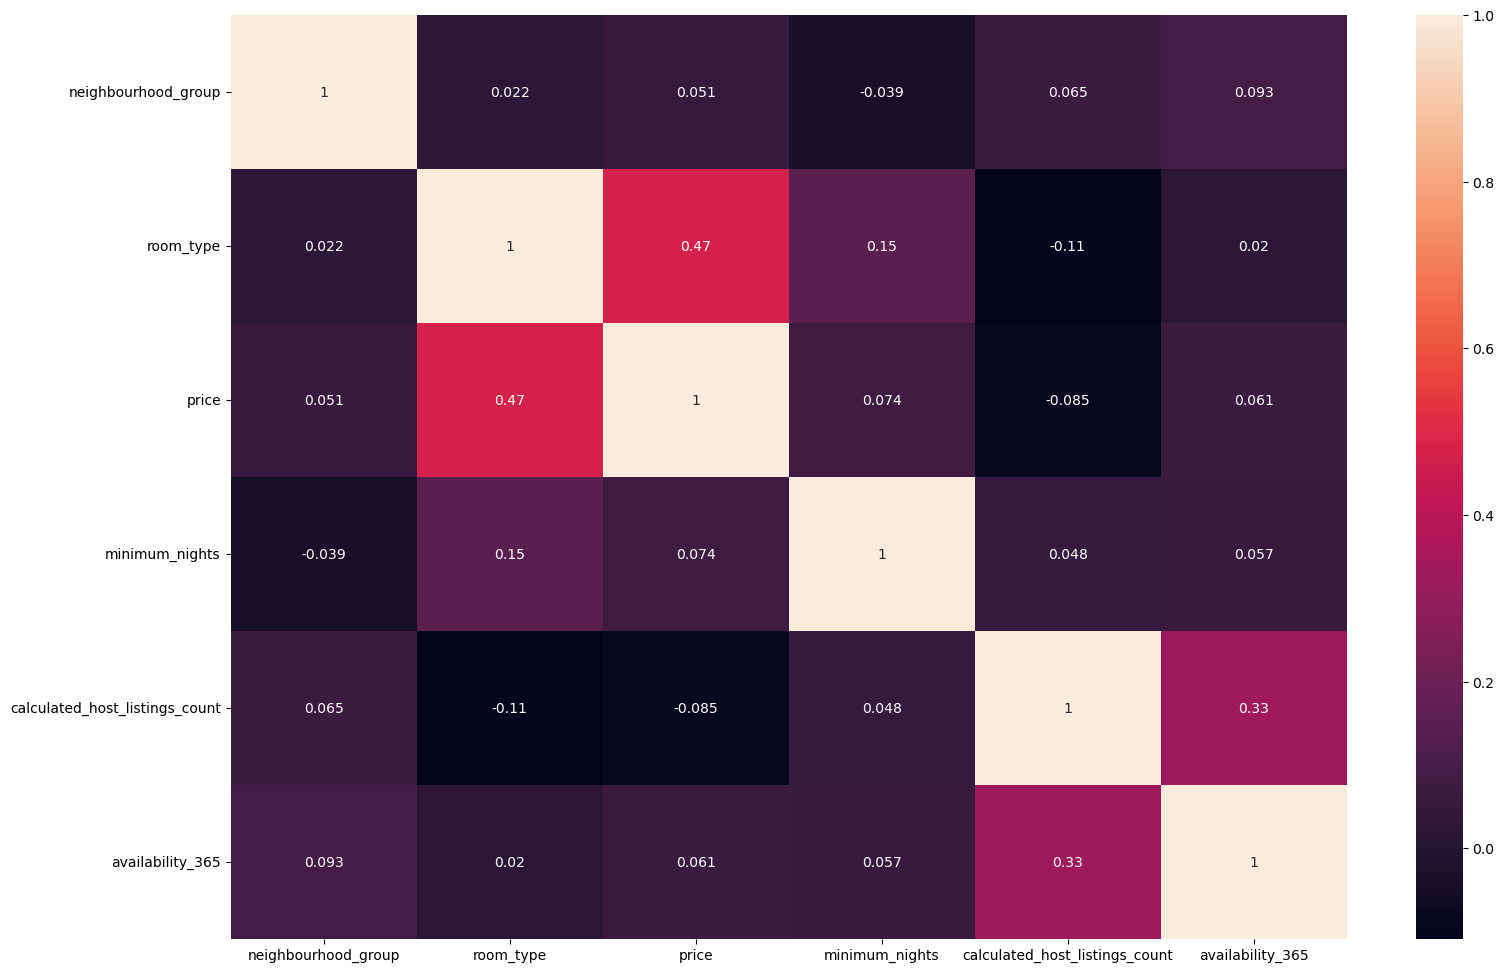

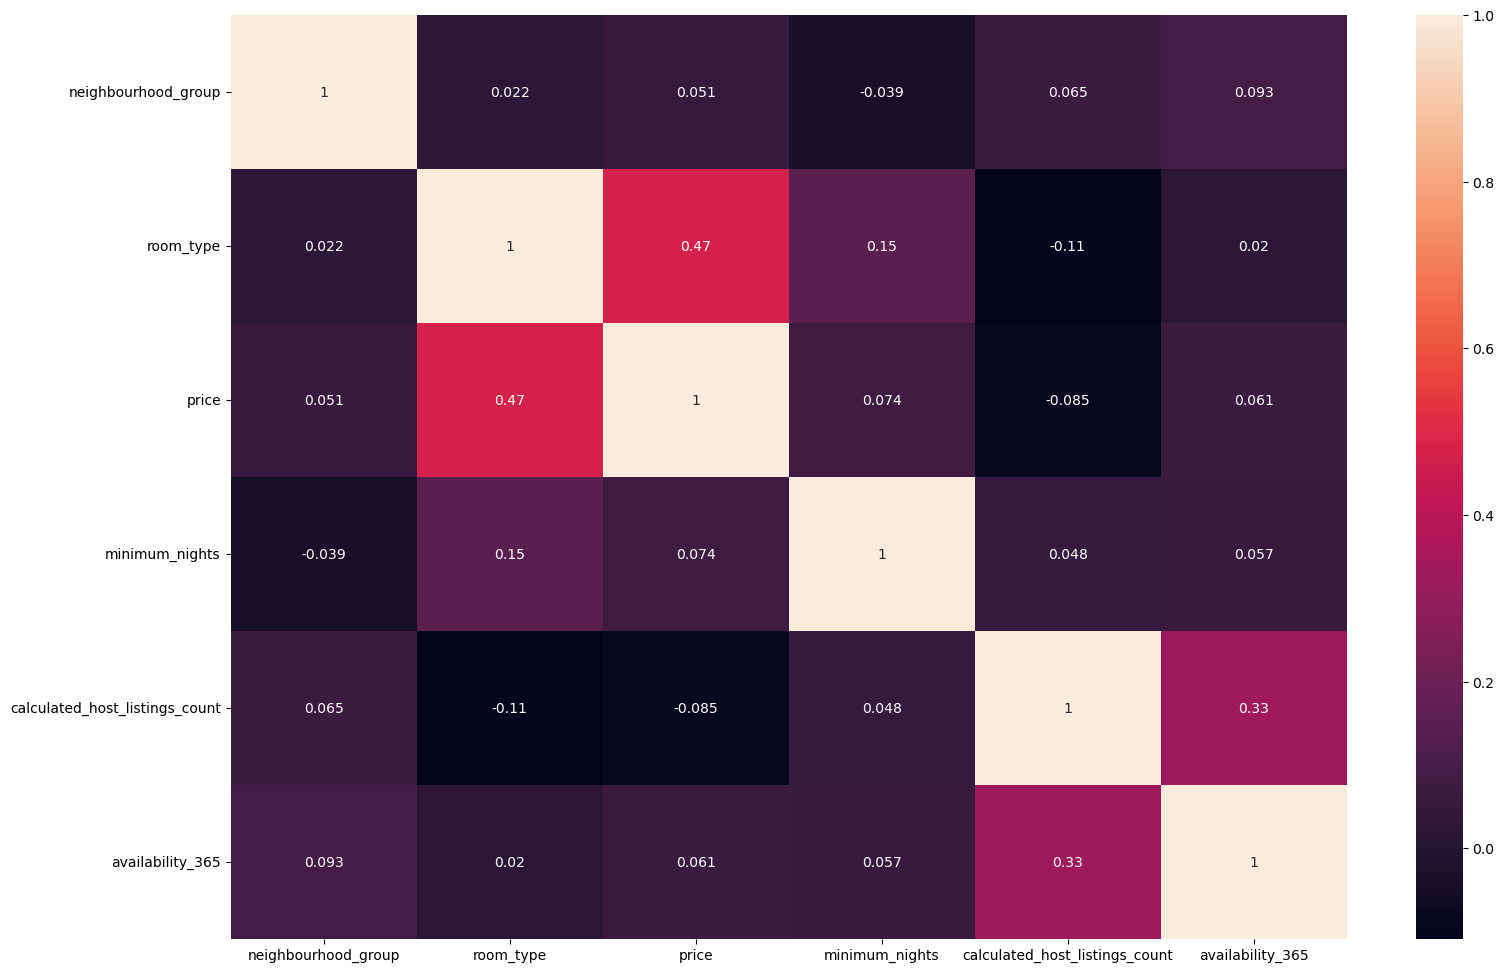

In [171]:
#Now let's see the correlation between our new variables
corr = airbnb_en.corr(method = 'kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot = True)
plt.show()

In [172]:
#Training
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [173]:
X = airbnb_en.iloc[:, [0, 1, 3, 4, 5]]
y = airbnb_en['price']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1,random_state=353)

In [174]:
X_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [175]:
X_train.shape

(44005, 5)

In [176]:
#Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [178]:
#Evaluating the model
score = r2_score(y_test, y_pred)
score

0.07480306392848968

In [180]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

176.5833751043437

In [199]:
#Decision Tree model
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1,random_state=105)
DTree = DecisionTreeRegressor(min_samples_leaf = .0001)
DTree.fit(X_train, y_train)
y_predict = DTree.predict(X_test)

In [200]:
r2_score(y_test, y_predict)

0.25340847089993634

In [207]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1,random_state=105)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [208]:
#Evaluating random forest
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

247.3562387916002

In [209]:
r2_score(y_test, y_pred)

0.23778232918722142